In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df_name = '../data/newSample/illustrisTNG/n_10/L205n1250TNG/comb_df_pairCandidatesAfterMass.pkl'

In [3]:
df = pd.read_pickle(df_name)
print(len(df))

7816


In [4]:
df[:1]

,DM_massA,DM_massB,Distance,ID_A,ID_B,Parent_A,Parent_B,Position_A,Position_B,Radial_vel,Stellar_massA,Stellar_massB,Tan_vel
0,9.873815e+12,5.249740e+12,2268.3779,134191,248237,1147,7302,"[62891.7539, 168907.2344, 45250.0859]","[61251.0547, 168055.3281, 46564.582]",-255.6178,8.507785e+10,1.671861e+10,422.5597


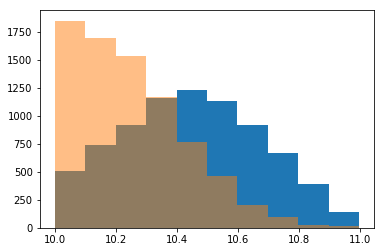

In [5]:
_ = plt.hist(np.log10(df['Stellar_massA']))
_ = plt.hist(np.log10(df['Stellar_massB']), alpha=0.5)

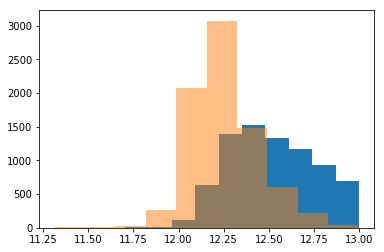

In [6]:
_ = plt.hist(np.log10(df['DM_massA']))
_ = plt.hist(np.log10(df['DM_massB']), alpha=0.5)

Text(0,0.5,'log Mstellar')

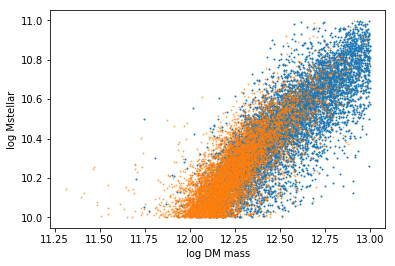

In [7]:
plt.scatter(np.log10(df['DM_massA']), np.log10(df['Stellar_massA']), s=1.0)
plt.scatter(np.log10(df['DM_massB']), np.log10(df['Stellar_massB']), s=1.0, alpha=0.5)
plt.xlabel('log DM mass')
plt.ylabel('log Mstellar')

(array([    49.,    347.,   1888.,   6483.,  10770.,  10381.,   7085.,
          3823.,    828.,     34.]),
 array([-1.55121224, -1.16275041, -0.77428859, -0.38582676,  0.00263507,
         0.39109689,  0.77955872,  1.16802055,  1.55648238,  1.9449442 ,
         2.33340603]),
 <a list of 10 Patch objects>)

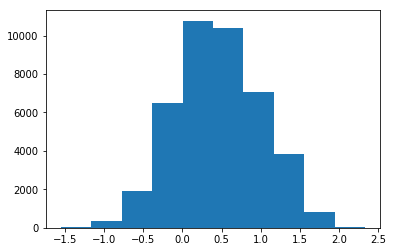

In [13]:
plt.hist(np.log10(df['Stellar_massA'])-np.log10(df['Stellar_massB']))

In [9]:
df_name = '../data/newStrategy/illustrisTNG/L205n1250TNG/DM_df_pairCandidatesAfterMass.pkl' 
df = pd.read_pickle(df_name)
print(len(df))

41688


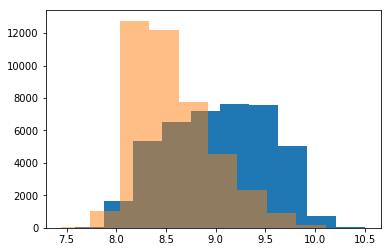

In [39]:
_ = plt.hist(np.log10(df['Stellar_massA']))
_ = plt.hist(np.log10(df['Stellar_massB']), alpha=0.5)

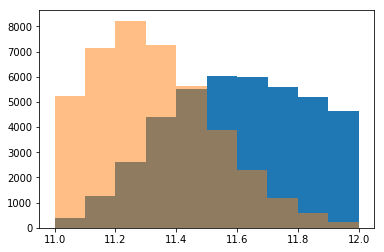

In [40]:
_ = plt.hist(np.log10(df['DM_massA']))
_ = plt.hist(np.log10(df['DM_massB']), alpha=0.5)

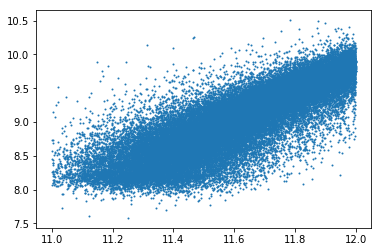

In [41]:
plt.scatter(np.log10(df['DM_massA']), np.log10(df['Stellar_massA']), s=1.0)

In [23]:
df_name = '../data/newStrategy/illustrisTNG/L205n1250TNG/stellar_df_pairCandidatesAfterMass.pkl' 
df = pd.read_pickle(df_name)
print(len(df))

12693


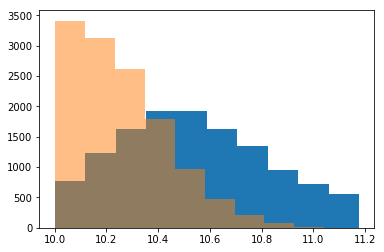

In [24]:
_ = plt.hist(np.log10(df['Stellar_massA']))
_ = plt.hist(np.log10(df['Stellar_massB']), alpha=0.5)

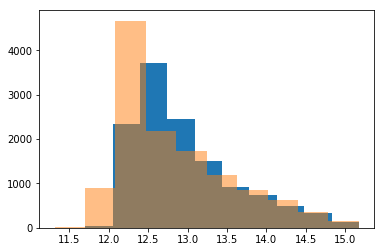

In [25]:
_ = plt.hist(np.log10(df['DM_massA']))
_ = plt.hist(np.log10(df['DM_massB']), alpha=0.5)

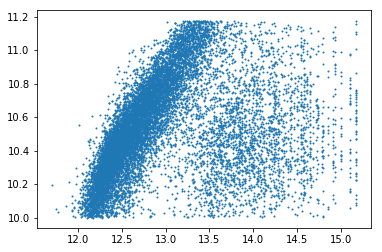

In [29]:
plt.scatter(np.log10(df['DM_massA']), np.log10(df['Stellar_massA']), s=1.0)